In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Load the datasets
from google.colab import files
uploaded=files.upload()

Saving Titanic_test.csv to Titanic_test (2).csv
Saving Titanic_train.csv to Titanic_train (2).csv


In [3]:
df1=pd.read_csv('Titanic_train.csv') # Load training data
df2=pd.read_csv('Titanic_test.csv') # Load testing data

In [4]:
df1.head() # Display first few rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2.head() # Load the first few rows of the dataframe

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df1.tail() # Displays the last few rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df2.tail() # Displays the last few rows of the dataframe

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
df1.shape # Displays the shape of the dataframe

(891, 12)

In [9]:
df2.shape # Displays the shape of the dataframe

(418, 11)

In [10]:
df1.size # Displays the size of the dataframe

10692

In [11]:
df2.size # Displays the size of the dataframe

4598

In [12]:
df1.info() # Displays the information about the columns present in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df2.info() # Displays the information about the columns present in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
df1.describe() # Gives the statistical values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df2.describe() # Gives the statistical values

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
df1.isnull().sum() # Gives the no of missing values in the dataframe

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
df2.isnull().sum() # Gives the no of missing values in the dataframe

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [18]:
df1['Age'].fillna(df1['Age'].median(),inplace=True)  # Fill missing values with the median
df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True)  # Fill missing values with the mode
df1.drop('Cabin',axis=1,inplace=True)  # Drop the 'Cabin' column


In [19]:
df1.isnull().sum() # Gives the no of missing values in the dataframe

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df2['Age'].fillna(df2['Age'].median(),inplace=True)  # Fill missing values with the median
df2['Fare'].fillna(df2['Fare'].median(),inplace=True)  # Fill missing values with the median
df2.drop('Cabin',axis=1,inplace=True)  # Drop the 'Cabin' column
df2['Embarked'].fillna(df2['Embarked'].mode()[0],inplace=True)  # Fill missing values with the mode

In [21]:
df2.isnull().sum() # Gives the no of missing values in the dataframe

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [22]:
df1.duplicated().sum() # Displays the no of duplicates in the dataframe

0

In [23]:
df2.duplicated().sum()  # Displays the no of duplicates in the dataframe

0

In [24]:
# Applying OneHotEncoding to the column 'Embarked'
df1=pd.get_dummies(df1,columns=['Embarked'],prefix='Embarked')
df2=pd.get_dummies(df2,columns=['Embarked'],prefix='Embarked')

In [25]:
# Applying LabelEncoding to the column 'Sex'
df1['Sex']=df1['Sex'].map({'male':0,'female':1})
df2['Sex']=df2['Sex'].map({'male':0,'female':1})

In [26]:
# Feature Engineering: Create 'FamilySize'
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1

In [27]:
# Data Scaling
scaler = StandardScaler()  # Initialize the StandardScaler

In [28]:
df1[['Age','Fare']]=scaler.fit_transform(df1[['Age','Fare']])  # Fit and transform the selected columns
df2[['Age','Fare']]=scaler.transform(df2[['Age','Fare']])  # Transform the selected columns using the fitted scaler

In [29]:
df1.head()  # Display the first few rows of the 'df1' DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,False,False,True,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.786845,True,False,False,2
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,False,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,False,False,True,2
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,False,False,True,1


In [30]:
df2.head()  # Display the first few rows of the 'df2' DataFrame

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,892,3,"Kelly, Mr. James",0,0.394887,0,0,330911,-0.490783,False,True,False,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.355510,1,0,363272,-0.507479,False,False,True,2
2,894,2,"Myles, Mr. Thomas Francis",0,2.508257,0,0,240276,-0.453367,False,True,False,1
3,895,3,"Wirz, Mr. Albert",0,-0.181487,0,0,315154,-0.474005,False,False,True,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.565736,1,1,3101298,-0.401017,False,False,True,3


In [31]:
df3=df2.copy()  # Create a copy of the 'df2' DataFrame

In [32]:
df3.head()  # Display the first few rows of the 'df3' DataFrame

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,892,3,"Kelly, Mr. James",0,0.394887,0,0,330911,-0.490783,False,True,False,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.355510,1,0,363272,-0.507479,False,False,True,2
2,894,2,"Myles, Mr. Thomas Francis",0,2.508257,0,0,240276,-0.453367,False,True,False,1
3,895,3,"Wirz, Mr. Albert",0,-0.181487,0,0,315154,-0.474005,False,False,True,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.565736,1,1,3101298,-0.401017,False,False,True,3


In [33]:
df1=df1.drop(['PassengerId','Name','Ticket'],axis=1)  # Drop specified columns from 'df1'
df2=df2.drop(['PassengerId','Name','Ticket'],axis=1)  # Drop specified columns from 'df2'

In [34]:
df1.head()  # Display the first few rows of the 'df1' DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,3,0,-0.565736,1,0,-0.502445,False,False,True,2
1,1,1,1,0.663861,1,0,0.786845,True,False,False,2
2,1,3,1,-0.258337,0,0,-0.488854,False,False,True,1
3,1,1,1,0.433312,1,0,0.420730,False,False,True,2
4,0,3,0,0.433312,0,0,-0.486337,False,False,True,1


In [35]:
df2.head()  # Display the first few rows of the 'df2' DataFrame

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,0,0.394887,0,0,-0.490783,False,True,False,1
1,3,1,1.355510,1,0,-0.507479,False,False,True,2
2,2,0,2.508257,0,0,-0.453367,False,True,False,1
3,3,0,-0.181487,0,0,-0.474005,False,False,True,1
4,3,1,-0.565736,1,1,-0.401017,False,False,True,3


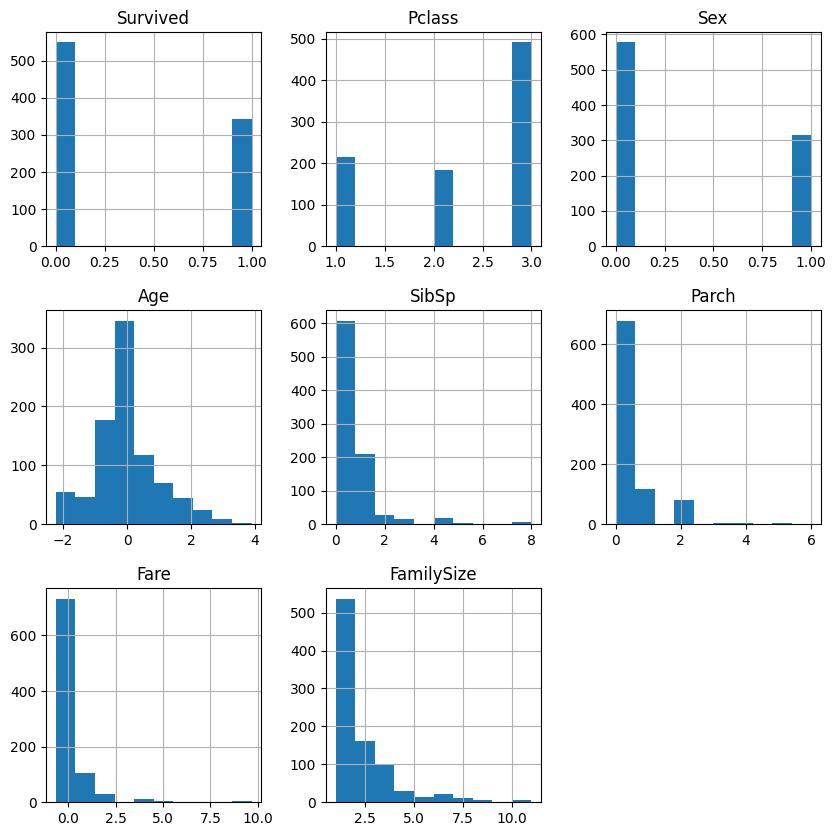

In [36]:
# Visualize histogram
df1.hist(figsize=(10,10))  # Plot histograms for all columns in 'df1'
plt.show()

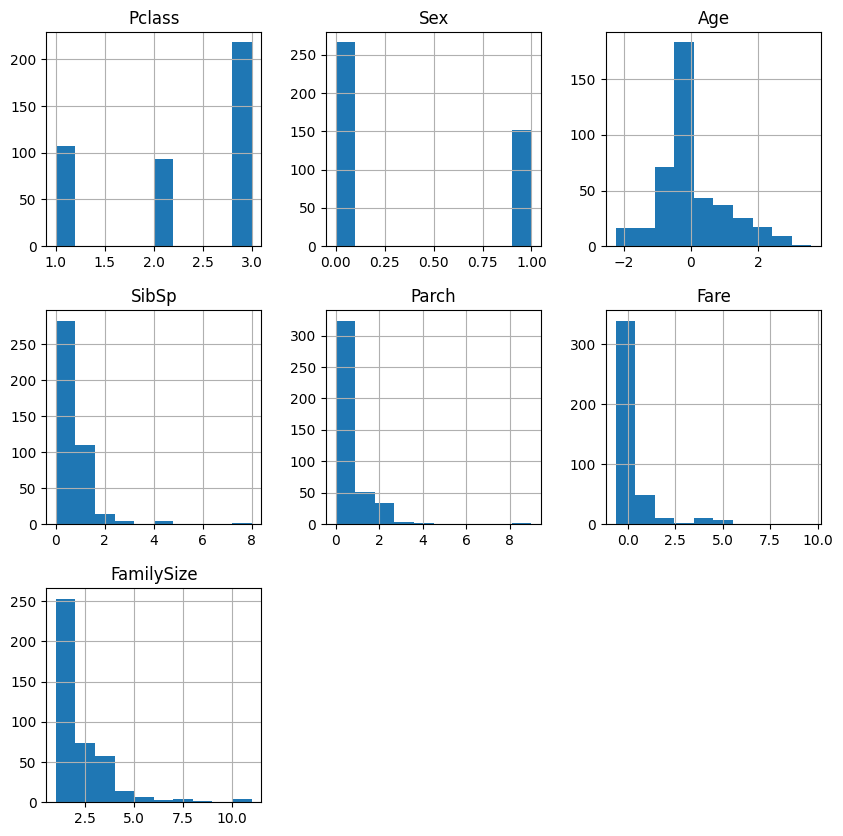

In [37]:
# Plot histograms for all columns in 'df2'
df2.hist(figsize=(10,10))
plt.show()

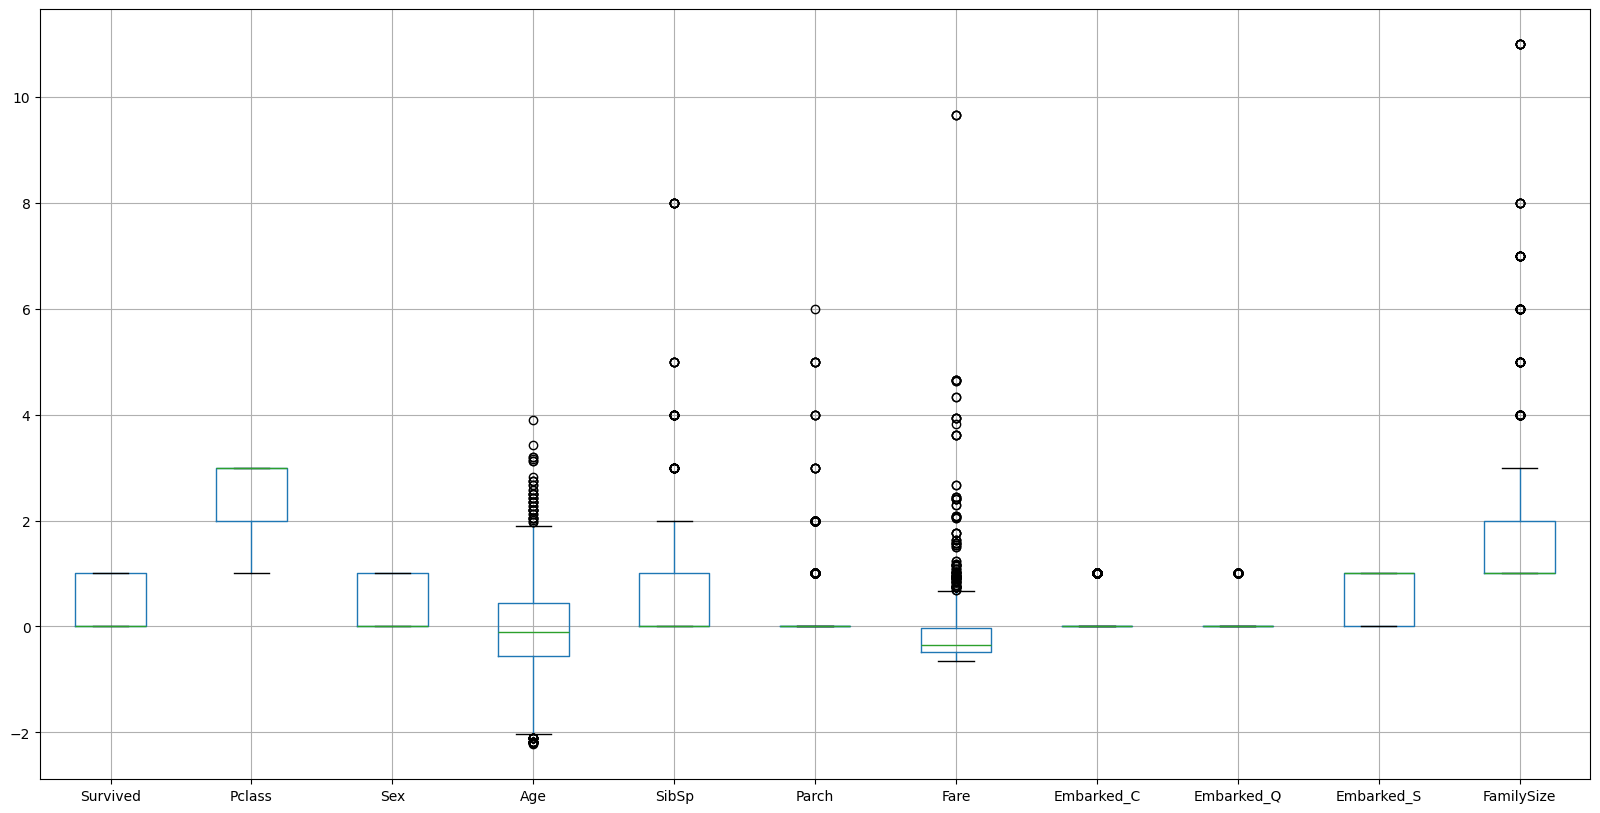

In [38]:
# Plot boxplots for all columns in 'df1'
df1.boxplot(figsize=(20,10))
plt.show()

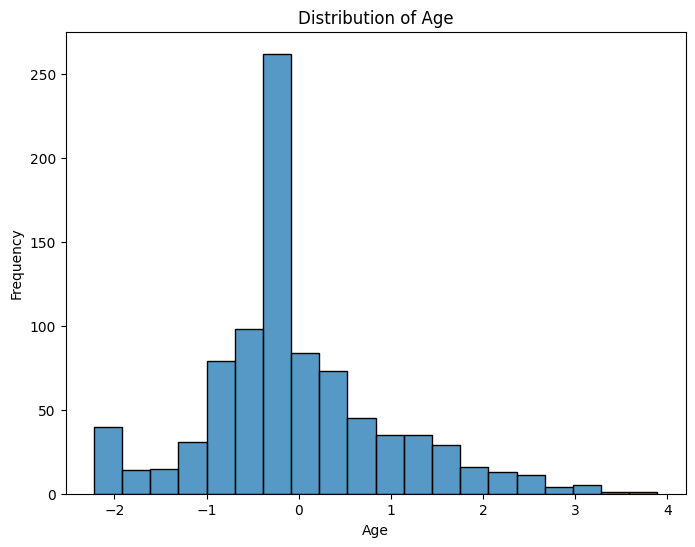

In [39]:
# Visualize histoplot for column 'Age'
plt.figure(figsize=(8, 6))  # Create a figure with specified size
sns.histplot(df1['Age'], bins=20)  # Plot a histogram for 'Age' column
plt.title('Distribution of Age')  # Set the title
plt.xlabel('Age')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()


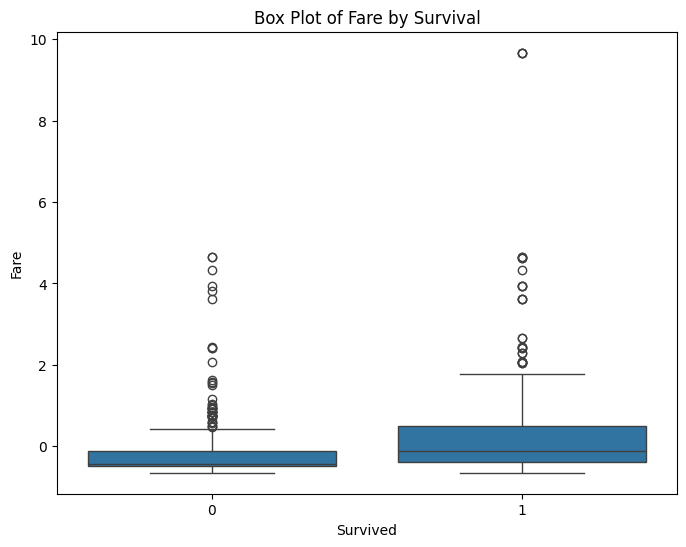

In [40]:
# Visualize boxplot
plt.figure(figsize=(8, 6))  # Create a figure with specified size
sns.boxplot(x='Survived', y='Fare', data=df1)  # Plot a boxplot for 'Survived' and 'Fare'
plt.title('Box Plot of Fare by Survival')  # Set the title
plt.xlabel('Survived')  # Set the x-axis label
plt.ylabel('Fare')  # Set the y-axis label
plt.show()

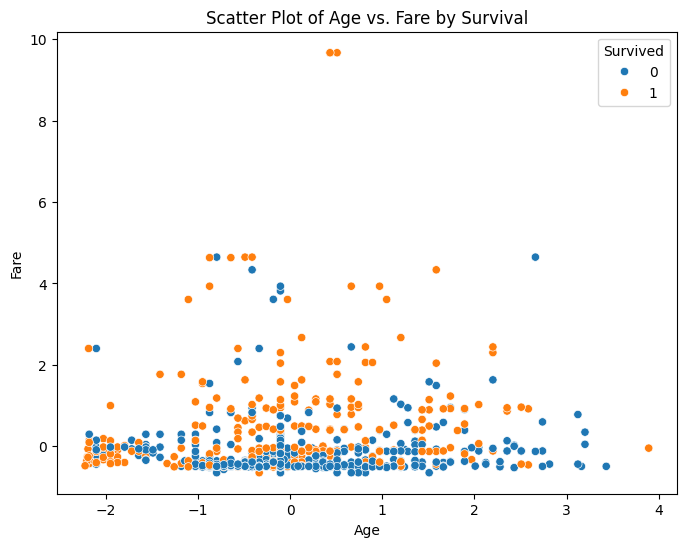

In [41]:
# Visualize Scatterplot
plt.figure(figsize=(8, 6))  # Create a figure with specified size
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df1)  # Plot a scatterplot with hue for 'Survived'
plt.title('Scatter Plot of Age vs. Fare by Survival')  # Set the title
plt.xlabel('Age')  # Set the x-axis label
plt.ylabel('Fare')  # Set the y-axis label
plt.show()

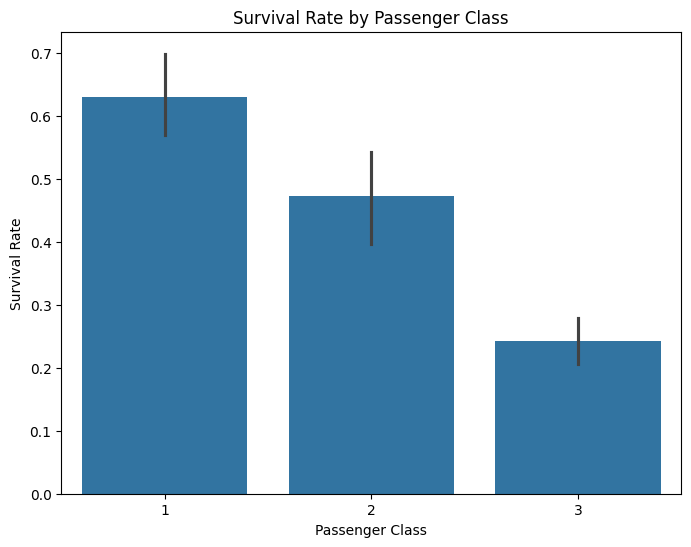

In [42]:
# Visualize bar chart for 'Pclass' and 'Survived
plt.figure(figsize=(8, 6))  # Create a figure with specified size
sns.barplot(x='Pclass', y='Survived', data=df1)  # Plot a bar chart for 'Pclass' and 'Survived'
plt.title('Survival Rate by Passenger Class')  # Set the title
plt.xlabel('Passenger Class')  # Set the x-axis label
plt.ylabel('Survival Rate')  # Set the y-axis label
plt.show()

In [43]:
df1.columns  # Display the column names in 'df1'

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize'],
      dtype='object')

In [44]:
features=df1.drop('Survived',axis=1)  # Create 'features' by dropping 'Survived' from 'df1'
target=df1['Survived']  # Create 'target' with 'Survived' from 'df1'


In [45]:
# splitting traing and testing data
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=42)

In [46]:
print(x_train.shape) # Prints 'x_train' shape
print(x_test.shape) # Prints 'x_test' shape
print(y_train.shape) # Prints 'y_train' shape
print(y_test.shape) # Prints 'y_test' shape

(712, 10)
(179, 10)
(712,)
(179,)


In [47]:
lgb_model=lgb.LGBMClassifier(random_state=42)  # Initialize LightGBM classifier

In [48]:
lgb_model.fit(x_train,y_train)  # Fit the model on training data

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(random_state=42)

In [49]:
lgb_pred=lgb_model.predict(x_test)  # Make predictions on test data

In [50]:
lgb_pred  # Display the predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [51]:
# Displays LGBM Performance on different metrics
print("LightGBM Performance:")
accuracy=accuracy_score(y_test, lgb_pred)
precision=precision_score(y_test,lgb_pred)
recall=recall_score(y_test,lgb_pred)
f1=f1_score(y_test,lgb_pred)
print('Accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

LightGBM Performance:
Accuracy: 0.8268156424581006
precision: 0.7866666666666666
recall: 0.7972972972972973
f1: 0.7919463087248322


In [52]:
xgb_model=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # Initialize XGBoost classifier

In [53]:
xgb_model.fit(x_train,y_train)  # Fit the model on training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [54]:
xgb_pred=xgb_model.predict(x_test)  # Make predictions on test data

In [55]:
# Displays XGBoost Performance on different metrics
print("XGBoost Performance:")
accuracy=accuracy_score(y_test, xgb_pred)
precision=precision_score(y_test,xgb_pred)
recall=recall_score(y_test,xgb_pred)
f1=f1_score(y_test,xgb_pred)
print('Accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

XGBoost Performance:
Accuracy: 0.8044692737430168
precision: 0.7746478873239436
recall: 0.7432432432432432
f1: 0.7586206896551724


In [56]:
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [57]:
# Create GridSearchCV object for LightGBM
lgb_grid = GridSearchCV(lgb_model, lgb_param_grid, cv=5, scoring='accuracy')

In [58]:
lgb_grid.fit(x_train, y_train)  # Fit the grid search to the training data

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [59]:
# Get the best LightGBM model
best_lgb_model = lgb_grid.best_estimator_

In [60]:
lgb_grid_pred = best_lgb_model.predict(x_test)  # Make predictions using the best model

In [61]:
xgb_param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]}

In [62]:
# Create GridSearchCV object for Xgbm
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy')

In [63]:
xgb_grid.fit(x_train, y_train) # Fit the Grid search on training data

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [64]:
best_xgb_model = xgb_grid.best_estimator_  # Get the best XGBoost model

In [65]:
xgb_grid_pred = best_xgb_model.predict(x_test)  # Make predictions using the best model

In [66]:
# Calculate performance metrics
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

In [67]:
# Create a DataFrame for better visualization
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

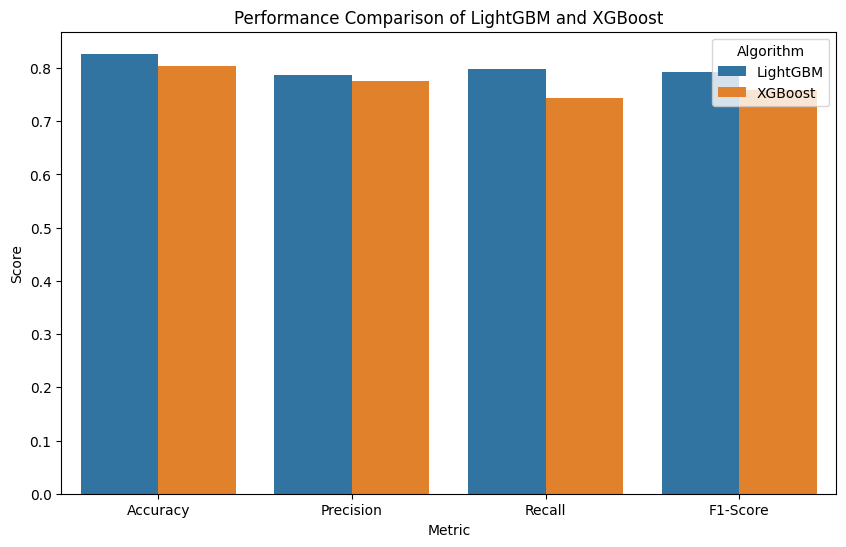

In [68]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(performance_df, ['Metric']))
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.ylabel('Score')
plt.legend(title='Algorithm')
plt.show()

XGBM AND LGBM model predictions on test set df2(Titanic test):


In [69]:
lgb_test_pred=lgb_model.predict(df2)  # Make predictions on test data using LightGBM model
xgb_test_pred=xgb_model.predict(df2)  # Make predictions on test data using XGBoost model

In [71]:
# This code takes the predictions made by your LightGBM model (lgb_test_pred) for the Titanic test dataset (df2 or its copy, df3) and saves them into a CSV file named Titanic_test_predictions.csv
output = pd.DataFrame({
    'PassengerId': df3['PassengerId'],  # Add PassengerId for reference
    'Survived': lgb_test_pred  # Replace with your model's predictions
})
output.to_csv('Titanic_test_predictions.csv', index=False)  # Save the predictions to a CSV file